<a href="https://colab.research.google.com/github/gabrielaequante/PLN-ProyectoFinal/blob/main/cleanfullpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Mount Google Drive
from google.colab import drive # import drive from google colab
import os
drive.mount("/content/drive")
os.chdir("/content/drive/My Drive/") 

Mounted at /content/drive


In [2]:
!ls

 app.py			  Datasets	      positive.txt    rnn_LSTM.h5
 bert			  drive		      PROYECTOFINAL   rnn_simple.h5
 Bert_test		  GRU		      __pycache__     sentiment_mod.py
 BRRN_LSTM.h5		  keras.hdf5	      rnn_bi	     'Twitter data'
 client-secret.json	  negative.txt	      rnn_Gru	      twitter-out.text
'Colab Notebooks'	  pickled_algos       rnn_GRU1	      Untitled0.ipynb
'Copia de negative.txt'   PLN-ProyectoFinal   rnn_lstm


In [3]:
os.chdir("/content/drive/My Drive/PROYECTOFINAL") 

In [4]:
!ls

' CLEANTESTpynb'        dev.tsv		 pruebatrain.csv   Untitled0.ipynb
 CLEANTRAINpynb.ipynb   Fulldata2.csv	 test.tsv
'dev (1).gsheet'        pruebadev.csv	 train.gsheet
 dev.gsheet	        pruebatest.csv	 train.tsv


# CLEANING




In [5]:
import pandas as pd
import itertools
import collections

import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
df = pd.read_csv("Fulldata2.csv")
df.head()

,id,label,text
0,0,0,"mood can be caused by infectious diseases, nu..."
1,1,1,"With all of this unnessary family drama, I fe..."
2,2,0,"I'm going to keep banging on about this, cos i..."
3,3,0,Ugh. Woke up to the same acne covered face thi...
4,4,0,Portable Transparent Tobacco Rolling Machine ...


In [9]:
#REMOVE MENTIONS 
import string
#re.sub("@[A-Za-z0-9]+","", "@thisisauser text")

def removemention(txt):
  return " ".join(re.sub("@[A-Za-z0-9]+","",txt).split())

#REMOVE URLS
import re
def remove_url(txt):
    return " ".join(re.sub("(@[^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

def cleaning_PicURL (txt):

    #text = re.sub(r'pic.twitter.com/[\w]*',"", txt)
    return " ".join(re.sub(r'pic.twitter.com/[\w]*',"", txt).split())

df['tweet'] = [remove_url(text) for text in df['text']]
df['tweet']=[removemention(tweet) for tweet in df['tweet']]
df['tweet']=[cleaning_PicURL(tweet) for tweet in df['tweet']]
df['tweet'] = df['tweet'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

#all_tweets_no_urls[:20]

In [10]:
df.head(20)

,id,label,text,tweet
0,0,0,"mood can be caused by infectious diseases, nu...",mood can be caused by infectious diseases nutr...
1,1,1,"With all of this unnessary family drama, I fe...",With all of this unnessary family drama I feel...
2,2,0,"I'm going to keep banging on about this, cos i...",Im going to keep banging on about this cos its...
3,3,0,Ugh. Woke up to the same acne covered face thi...,Ugh Woke up to the same acne covered face this...
4,4,0,Portable Transparent Tobacco Rolling Machine ...,Portable Transparent Tobacco Rolling Machine
5,5,0,Certain medications are known to cause mood i...,Certain medications are known to cause mood in...
6,6,1,"I feel so sad because i can't be happy, and th...",I feel so sad because i cant be happy and that...
7,7,1,I went to church with my mom and a huge chunk ...,I went to church with my mom and a huge chunk ...
8,8,1,No love here.... pic.twitter.com/FuvBXIPRnu,No love here
9,9,1,I see so many people moving forward with their...,I see so many people moving forward with their...


In [11]:
df['tweet'][2].split()

['Im',
 'going',
 'to',
 'keep',
 'banging',
 'on',
 'about',
 'this',
 'cos',
 'its',
 'true',
 'What',
 'you',
 'focus',
 'on',
 'you',
 'get',
 'more',
 'of',
 'Stop',
 'telling',
 'yourself',
 'youre',
 'or',
 'Tell',
 'yourself',
 'youre',
 'happy',
 'strong',
 'confident',
 'powerful',
 'Not',
 'only',
 'cos',
 'you',
 'ARE',
 'but',
 'cos',
 'your',
 'brilliant',
 'mind',
 'listens',
 'to',
 'what',
 'you',
 'tell',
 'it']

In [12]:
df['tweet'][7]

'I went to church with my mom and a huge chunk of the sermon was basically “if you’re it’s because your faith is weak” and  this is why I don’t go to church or tell my mom I’m on antidepressants '

In [13]:

words_in_tweet = [tweet.lower().split() for tweet in df['tweet']]
words_in_tweet[2:5]

[['im',
  'going',
  'to',
  'keep',
  'banging',
  'on',
  'about',
  'this',
  'cos',
  'its',
  'true',
  'what',
  'you',
  'focus',
  'on',
  'you',
  'get',
  'more',
  'of',
  'stop',
  'telling',
  'yourself',
  'youre',
  'or',
  'tell',
  'yourself',
  'youre',
  'happy',
  'strong',
  'confident',
  'powerful',
  'not',
  'only',
  'cos',
  'you',
  'are',
  'but',
  'cos',
  'your',
  'brilliant',
  'mind',
  'listens',
  'to',
  'what',
  'you',
  'tell',
  'it'],
 ['ugh',
  'woke',
  'up',
  'to',
  'the',
  'same',
  'acne',
  'covered',
  'face',
  'this',
  'morning',
  'yyayyy'],
 ['portable', 'transparent', 'tobacco', 'rolling', 'machine']]

In [14]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('i', 1554),
 ('to', 1461),
 ('the', 1329),
 ('and', 1094),
 ('a', 995),
 ('you', 763),
 ('of', 747),
 ('my', 730),
 ('is', 688),
 ('in', 621),
 ('it', 545),
 ('depression', 538),
 ('for', 490),
 ('that', 409),
 ('me', 393)]

In [15]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,i,1554
1,to,1461
2,the,1329
3,and,1094
4,a,995


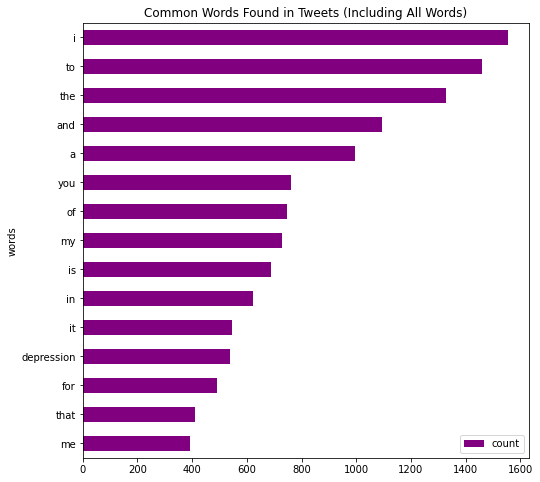

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [17]:
#DELETE STOPWORDS
df['tweet']=df['tweet'].apply(lambda x: x.lower())
df['tweetstop'] = df['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))
#dftrain.head(10)

In [18]:
df

,id,label,text,tweet,tweetstop
0,0,0,"mood can be caused by infectious diseases, nu...",mood can be caused by infectious diseases nutr...,mood caused infectious diseases nutritional de...
1,1,1,"With all of this unnessary family drama, I fe...",with all of this unnessary family drama i feel...,unnessary family drama feel like moving far aw...
2,2,0,"I'm going to keep banging on about this, cos i...",im going to keep banging on about this cos its...,im going keep banging cos true focus get stop ...
3,3,0,Ugh. Woke up to the same acne covered face thi...,ugh woke up to the same acne covered face this...,ugh woke acne covered face morning yyayyy
4,4,0,Portable Transparent Tobacco Rolling Machine ...,portable transparent tobacco rolling machine,portable transparent tobacco rolling machine
...,...,...,...,...,...
2995,2995,0,"well, actually he's now sitting at his compute...",well actually hes now sitting at his computer ...,well actually hes sitting computer updating tw...
2996,2996,0,@HARLEMVIXEN Good morning,good morning,good morning
2997,2997,0,Just had three dreams where i was supposed to ...,just had three dreams where i was supposed to ...,three dreams supposed school freaking tgisb
2998,2998,0,@pgeorges I prefer running native OSX apps whe...,i prefer running native osx apps when i can,prefer running native osx apps


In [ ]:
#new_df = dftrain.replace('…', " ")

In [ ]:
#new_df['tweet'][7]

In [19]:
words_in_tweet = [tweet.lower().split() for tweet in df['tweetstop']]
words_in_tweet[2:5]

[['im',
  'going',
  'keep',
  'banging',
  'cos',
  'true',
  'focus',
  'get',
  'stop',
  'telling',
  'youre',
  'tell',
  'youre',
  'happy',
  'strong',
  'confident',
  'powerful',
  'cos',
  'cos',
  'brilliant',
  'mind',
  'listens',
  'tell'],
 ['ugh', 'woke', 'acne', 'covered', 'face', 'morning', 'yyayyy'],
 ['portable', 'transparent', 'tobacco', 'rolling', 'machine']]

In [20]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('depression', 538),
 ('im', 319),
 ('like', 241),
 ('dont', 181),
 ('feel', 179),
 ('one', 159),
 ('life', 153),
 ('day', 153),
 ('get', 147),
 ('people', 144),
 ('know', 133),
 ('year', 132),
 ('time', 122),
 ('want', 117),
 ('today', 113)]

In [22]:
clean_tweets_no_stop = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_stop.head()

,words,count
0,depression,538
1,im,319
2,like,241
3,dont,181
4,feel,179


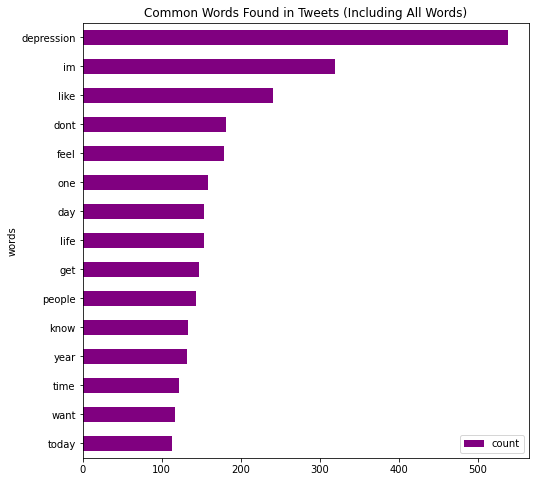

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_stop.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [24]:
df

,id,label,text,tweet,tweetstop
0,0,0,"mood can be caused by infectious diseases, nu...",mood can be caused by infectious diseases nutr...,mood caused infectious diseases nutritional de...
1,1,1,"With all of this unnessary family drama, I fe...",with all of this unnessary family drama i feel...,unnessary family drama feel like moving far aw...
2,2,0,"I'm going to keep banging on about this, cos i...",im going to keep banging on about this cos its...,im going keep banging cos true focus get stop ...
3,3,0,Ugh. Woke up to the same acne covered face thi...,ugh woke up to the same acne covered face this...,ugh woke acne covered face morning yyayyy
4,4,0,Portable Transparent Tobacco Rolling Machine ...,portable transparent tobacco rolling machine,portable transparent tobacco rolling machine
...,...,...,...,...,...
2995,2995,0,"well, actually he's now sitting at his compute...",well actually hes now sitting at his computer ...,well actually hes sitting computer updating tw...
2996,2996,0,@HARLEMVIXEN Good morning,good morning,good morning
2997,2997,0,Just had three dreams where i was supposed to ...,just had three dreams where i was supposed to ...,three dreams supposed school freaking tgisb
2998,2998,0,@pgeorges I prefer running native OSX apps whe...,i prefer running native osx apps when i can,prefer running native osx apps


In [25]:
df['tweetstop']=df['tweetstop'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))


In [26]:
df

,id,label,text,tweet,tweetstop
0,0,0,"mood can be caused by infectious diseases, nu...",mood can be caused by infectious diseases nutr...,mood caused infectious diseases nutritional de...
1,1,1,"With all of this unnessary family drama, I fe...",with all of this unnessary family drama i feel...,unnessary family drama feel like moving far aw...
2,2,0,"I'm going to keep banging on about this, cos i...",im going to keep banging on about this cos its...,im going keep banging cos true focus get stop ...
3,3,0,Ugh. Woke up to the same acne covered face thi...,ugh woke up to the same acne covered face this...,ugh woke acne covered face morning yyayyy
4,4,0,Portable Transparent Tobacco Rolling Machine ...,portable transparent tobacco rolling machine,portable transparent tobacco rolling machine
...,...,...,...,...,...
2995,2995,0,"well, actually he's now sitting at his compute...",well actually hes now sitting at his computer ...,well actually hes sitting computer updating tw...
2996,2996,0,@HARLEMVIXEN Good morning,good morning,good morning
2997,2997,0,Just had three dreams where i was supposed to ...,just had three dreams where i was supposed to ...,three dreams supposed school freaking tgisb
2998,2998,0,@pgeorges I prefer running native OSX apps whe...,i prefer running native osx apps when i can,prefer running native osx apps


In [27]:
df[['label','tweetstop']].to_csv('data.csv', index=False) 